# a2 - python - CS5831

This assignment will cover topics from data, data preprocessing, and classification.

Make sure that you keep this notebook named as "a2-5831.ipynb" 

Submit the zip-file created after running your notebook on the Linux lab machines.

Any other packages or tools, outside those listed in the assignments or Canvas, should be cleared
by Dr. Brown before use in your submission.

## Q0 - Setup

The following code looks to see whether your notebook is run on Gradescope (GS), Colab (COLAB), or the linux Python environment you were asked to setup.

In [1]:
import re 
import os
import platform 
import sys 

# flag if notebook is running on Gradescope 
if re.search(r'amzn', platform.uname().release): 
    GS = True
else: 
    GS = False

# flag if notebook is running on Colaboratory 
try:
  import google.colab
  COLAB = True
except:
  COLAB = False

# flag if running on Linux lab machines. 
cname = platform.uname().node
if re.search(r'(guardian|colossus|c28|coc-15954-m)', cname):
    LLM = True 
else: 
    LLM = False

print("System: GS - %s, COLAB - %s, LLM - %s" % (GS, COLAB, LLM))

System: GS - False, COLAB - False, LLM - True


In [2]:
# Import standard DS packages 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import textwrap
%matplotlib inline

from sklearn import tree        # decision tree classifier
from sklearn import neighbors   # knn classifier
from sklearn import naive_bayes # naive bayes classifier 
from sklearn import metrics     # performance evaluation metrics
from sklearn import model_selection
from sklearn import preprocessing 
from sklearn import pipeline
# import graphviz, pydotplus

from sklearn.model_selection import train_test_split, StratifiedKFold 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score,mean_squared_error
from sklearn.metrics import confusion_matrix

# Package for Autograder 
import os
if os.environ["HOME"]=='/home/jovyan':
    !pip install --upgrade otter-grader
    
import otter 
grader = otter.Notebook()

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Q1 - Exploratory Data Analysis 

Consider the `movies` data set available on Canvas. The data set is made up of over 600 randomly selected movies, released before 2016, with information extracted from IMDB and Rotten Tomatoes. A code book on the variables is also provided.

You should explore the files a bit in a text editor to understand the format. The variables are made up of different types: nominal, ordinal, numeric, etc. We will refer to the different variables by their column / codebook names.


<!-- BEGIN QUESTION -->

# *Missing Data*

## Q1(a) - Examine data for loading 

Look at the `movies` data set.  Is there any missing data in the `movies` data set? 
If so, how is it encoded? 

Missing data is encoded as: 'NA'

<!-- END QUESTION -->

## Q1(b) - Load the data

Load the movies data into a DataFrame `q1movies`.  Is there any missing data in the `movies` data set? 
If yes, make sure to encode those missing values when reading the data in pandas `read_csv` function. 


In [3]:
# Read in movies data with pandas "read_csv" function
#  Use column names from the original csv file 

q1movies = pd.read_csv('movies.csv')

q1movies.head()

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [4]:
grader.check("q1b")

q1b results: All test cases passed!

## Q1(c) - Missing data 

We want to understand where (which variable) and how much data is missing (for each variable the percentage of rows). 

In [5]:
# Create a Data.Series that has the percentage of missing data for each 
#  attribute in the movies data set.

# Convert column headers to list
headers = list(q1movies.columns)

# Create empty list
miss_data_list = []

# For loop to calculate percentage of 'NA' values per column
# Calculation = # of NA divided by # of rows times 100
for col in q1movies.columns:
    NA_count = q1movies[col].isnull().sum()/len(q1movies)*100
    miss_data_list.append(NA_count)

# Convert missing data list to series and use column headers as series index
miss_data = pd.Series(miss_data_list, index=headers)

miss_data

title               0.000000
title_type          0.000000
genre               0.000000
runtime             0.154799
mpaa_rating         0.000000
studio              1.083591
thtr_rel_year       0.000000
thtr_rel_month      0.000000
thtr_rel_day        0.000000
dvd_rel_year        1.238390
dvd_rel_month       1.238390
dvd_rel_day         1.238390
imdb_rating         0.000000
imdb_num_votes      0.000000
critics_rating      0.000000
critics_score       0.000000
audience_rating     0.000000
audience_score      0.000000
best_pic_nom        0.000000
best_pic_win        0.000000
best_actor_win      0.000000
best_actress_win    0.000000
best_dir_win        0.000000
top200_box          0.000000
director            0.309598
actor1              0.309598
actor2              1.083591
actor3              1.393189
actor4              1.857585
actor5              2.167183
imdb_url            0.000000
rt_url              0.000000
dtype: float64

In [6]:
grader.check("q1c")

q1c results: All test cases passed!

## Q1(d) - Clean data 

We want to clean up data with respect to the missing values. 

Ignore any missing values in the `studio`, `dvd_rel_year`, `dvd_rel_month`, `dvd_rel_day`, and all variables including and listed after `best_pic_nom`. For other missing values, remove the sample that contains the missing value.

Save the resulting DataFrame in the `movies` variable.  

In [7]:

# Ignore missing values in "studio", "dvd_rel_year", "dvd_rel_month", 
#   "dvd_rel_day", and all varaibles including and after "best_pic_nom"
# For other missing values, remove the sample that contains the missing value. 

movies = q1movies.dropna(subset=['title', 'title_type', 'genre', 'runtime', 'mpaa_rating',
                           'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day',
                           'imdb_rating', 'imdb_num_votes','critics_rating', 'critics_score',
                           'audience_rating', 'audience_score'])

movies.shape

(645, 32)

In [8]:
grader.check("q1d")

q1d results: All test cases passed!

## Q1(e) - Attribute Types

For the following variables, state the attribute type: 1- *nominal*, 2- *ordinal*, 3- *interval*, or 4- *ratio*. 

In [9]:
type_genre = 1
type_runtime = 3
type_mpaa_rating = 2
type_studio = 1
type_thtr_rel_month = 3
type_imdb_rating = 2
type_audience_score = 3
type_best_pic_win = 1

In [10]:
grader.check("q1e")

q1e results: All test cases passed!

# *Summary Statistics*

## Q1(f) - Statistics, part 1

For the following variables, report out a five number summary:
`audience_score` and `imdb_rating`

Store results in a DataFrame: `q1f`

*Hint:* consider using the `describe` function.


In [11]:

# Report five number summary for variables `audience_score` and `imdb_rating` in 
#  a DataFrame "q1f" 
#  Rows should represent: min, Q1 - 25%, Q2 - 50%, Q3 - 50%, max 
#  Columns should be `audience_score` then `imdb_rating` 

# Subset movies data frame
q1f = movies[['audience_score', 'imdb_rating']]

# Use describe() function to get min, Q1 - 25%, Q2 - 50%, Q3 - 50%, max values
q1f = q1f.describe().loc[['min', '25%', '50%', '75%', 'max']]

q1f

,audience_score,imdb_rating
min,11.0,1.9
25%,46.0,5.9
50%,65.0,6.6
75%,80.0,7.3
max,97.0,9.0


In [12]:
grader.check("q1f")

q1f results: All test cases passed!

## Q1(g) - Statistics, part 2 

Report the mean, median, and mode of `critics_score` and `runtime` to the given variables. 

In [15]:
# Report mean, median and mode of "critics_score" and "runtime" 

# For critics_score- 
q1g_cs_mean = movies['critics_score'].mean()
q1g_cs_median = movies['critics_score'].median()
# Using iloc[] to pull out value because mode() returns a data series instead of a single value
q1g_cs_mode = movies['critics_score'].mode().iloc[0]

# For runtime- 
q1g_r_mean = movies['runtime'].mean()
q1g_r_median = movies['runtime'].median()
# Adding the .max() function since the .mode() function returns two values that have equal frequency
q1g_r_mode = movies['runtime'].mode().max()

In [16]:
grader.check("q1g")

q1g results:
    q1g - 1 result:
        ✅ Test case passed

    q1g - 2 result:
        ✅ Test case passed

    q1g - 3 result:
        ❌ Test case failed
        Trying:
            round(q1g_cs_mode, 4) == 67 and round(q1g_r_mode, 4) == 100.0
        Expecting:
            True
        **********************************************************************
        Line 1, in q1g 2
        Failed example:
            round(q1g_cs_mode, 4) == 67 and round(q1g_r_mode, 4) == 100.0
        Expected:
            True
        Got:
            np.True_

## Q1(h) - Statistics, part 3

Report the first quartile, 37th percentile, third quartile, and 83rd percentile
for `critics_score` and `runtime` and assign it to the given variables.  

In [17]:
# Report first quartile, 31st percentile, third quartile, and 90th percentile
#  of "critics_score" and "runtime" 

# For critics_score- 
q1h_cs_q1 = movies['critics_score'].describe(percentiles=[0.25]).loc['25%']
q1h_cs_p37 = movies['critics_score'].describe(percentiles=[0.37]).loc['37%']
q1h_cs_q3 = movies['critics_score'].describe(percentiles=[0.75]).loc['75%']
q1h_cs_p83 = movies['critics_score'].describe(percentiles=[0.83]).loc['83%']

# For runtime- 
q1h_r_q1 = movies['runtime'].describe(percentiles=[0.25]).loc['25%']
q1h_r_p37 = movies['runtime'].describe(percentiles=[0.37]).loc['37%']
q1h_r_q3 = movies['runtime'].describe(percentiles=[0.75]).loc['75%']
q1h_r_p83 = movies['runtime'].describe(percentiles=[0.83]).loc['83%']

In [18]:
grader.check("q1h")

q1h results: All test cases passed!

<!-- BEGIN QUESTION -->

# *Visualizations* 

## Q1(i) Visualization: Single Variable 

I highly encourage looking at the [Fundamentals of Visualization](https://clauswilke.com/dataviz/index.html) reference book to guide in the creation of “good” visualizations requested below.


Create a bar plot for the `critics_rating` variable.

''

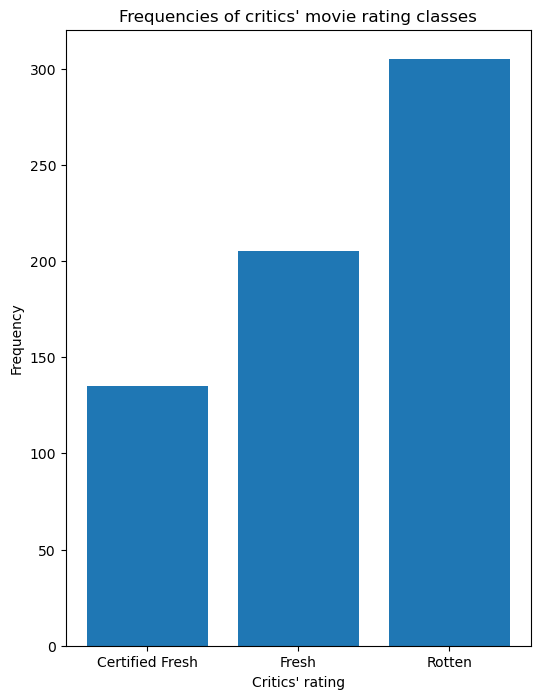

In [19]:

# Create bar plot for "critics_rating" 

# Subset and sort data
Q1 = movies['critics_rating'].value_counts().reset_index()
Q1 = Q1.sort_values(by='critics_rating')
rating = Q1['critics_rating']
counts = Q1['count']

# Set the figure size
plt.figure(figsize=(6, 8))

# Title and axis labels
plt.title("Frequencies of critics' movie rating classes")
plt.xlabel("Critics' rating")
plt.ylabel("Frequency")

# Create the bar plot
plt.bar(rating, counts)
;


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(j) Visualization: Two Variables 

Create a violin plot for `imdb_rating` grouped by `mpaa_rating` (sorted by mpaa rating, where 'Unrated' is last).



/tmp/ipykernel_206253/1694982888.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1j['mpaa_rating'] = pd.Categorical(Q1j['mpaa_rating'], categories=rating_order, ordered=True)


''

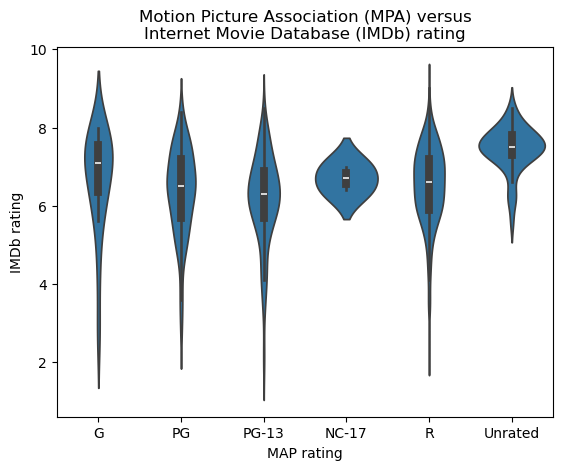

In [20]:

# Create a violin plot for `imdb_rating` grouped by `mpaa_rating` (sorted)

# Subset and sort data
Q1j = movies[['imdb_rating', 'mpaa_rating']]
# Setting the order to reflect the correct ordinal nature of the 'mpaa
rating_order = ['G', 'PG', 'PG-13', 'NC-17', 'R', 'Unrated']
Q1j['mpaa_rating'] = pd.Categorical(Q1j['mpaa_rating'], categories=rating_order, ordered=True)
Q1j = Q1j.sort_values(by='mpaa_rating')

# Seaborn violin plot
fig1j = sns.violinplot(data=Q1j, x='mpaa_rating', y='imdb_rating')
fig1j.set_title('Motion Picture Association (MPA) versus\nInternet Movie Database (IMDb) rating')
fig1j.set_xlabel('MAP rating')
fig1j.set_ylabel('IMDb rating')
;


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(k) Visualization: Multiple variables

Create a stacked bar chart to display the proportion of wins (nominations) for the 5 `best_*` variables.


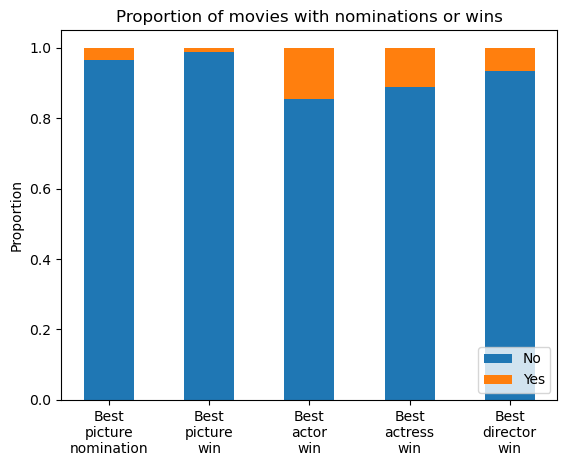

In [21]:

# Create a stacked bar chart to display the proportion of wins (nominations) 
#   for the 5 `best_*` variables.

# Subset data
Q1k = movies[['best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win']]

# Calculate proportions of 'no' and 'yes' for each category
picNomNo = Q1k['best_pic_nom']
picNomNo = picNomNo[picNomNo == 'no'].count()/len(picNomNo)
picWinNo = Q1k['best_pic_win']
picWinNo = picWinNo[picWinNo == 'no'].count()/len(picWinNo)
actWinNo = Q1k['best_actor_win']
actWinNo = actWinNo[actWinNo == 'no'].count()/len(actWinNo)
actressWinNo = Q1k['best_actress_win']
actressWinNo = actressWinNo[actressWinNo == 'no'].count()/len(actressWinNo)
dirWinNo = Q1k['best_dir_win']
dirWinNo = dirWinNo[dirWinNo == 'no'].count()/len(dirWinNo)

No_list = [picNomNo, picWinNo, actWinNo, actressWinNo, dirWinNo]

picNomYes = 1- picNomNo
picWinYes = 1 - picWinNo
actWinYes = 1 - actWinNo
actressWinYes = 1 - actressWinNo
dirWinYes = 1 - dirWinNo

Yes_list = [picNomYes, picWinYes, actWinYes, actressWinYes, dirWinYes]

# Create stacked bar plot
Categories = (
    "Best\npicture\nnomination",
    "Best\npicture\nwin",
    "Best\nactor\nwin",
    "Best\nactress\nwin",
    "Best\ndirector\nwin"
)
prop_win = {
    "No": np.array(No_list),
    "Yes": np.array(Yes_list),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, prop_win in prop_win.items():
    p = ax.bar(Categories, prop_win, width, label=boolean, bottom=bottom)
    bottom += prop_win

ax.set_title("Proportion of movies with nominations or wins")
ax.set_ylabel("Proportion")
ax.legend(loc="lower right")

plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(l) Visualization: Two Variables 

Create an overlapping density plot for `critics_score` grouped by `audience_rating`. 

''

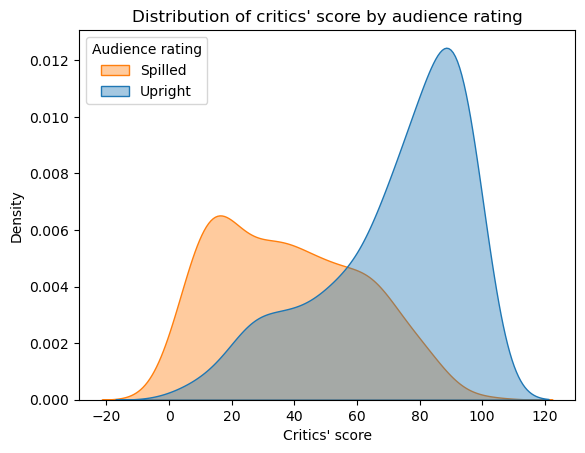

In [22]:
# Create overlapping density plot


# NOTE the kde plot extends beyond the actual range of critics' score values, which range from 0-100
# Create overlapping density plot
Q1lfig = sns.kdeplot(data=movies,
                     x='critics_score',
                     hue='audience_rating',
                     fill=True,
                     alpha=0.40,
                     )
                     
# Set titles and labels
Q1lfig.set_title("Distribution of critics' score by audience rating")
Q1lfig.set_xlabel("Critics' score")
# Note that labels have been rearranged to match correctly with data
Q1lfig.legend(title='Audience rating', labels=['Spilled', 'Upright'])
;

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(m) Visualization: Multiple variables 

Create a small multiples (or faceted) scatter plot of `imdb_rating` (y-axis) against `runtime` (x-axis) for each `critics_rating`.


''

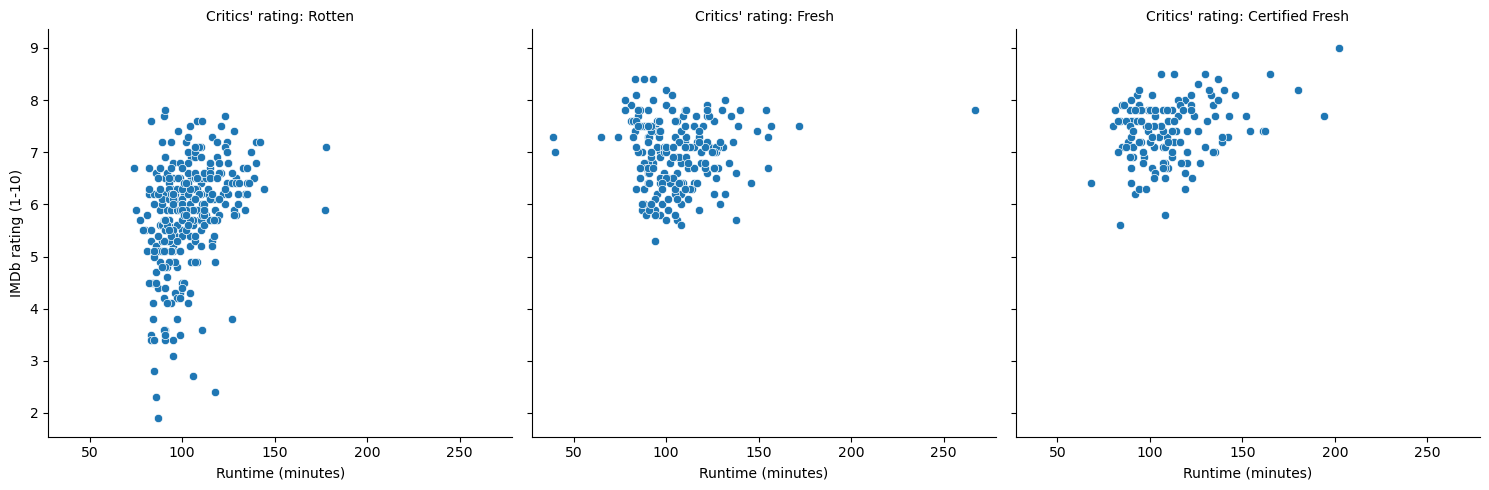

In [23]:

# Create a small multiples (or faceted) scatter plot of `imdb_rating` vs. 
#   `runtime` for each `critics_rating`.

# movies ['imdb_rating'] is continuous numerical
# movies['runtime'] is continuous numerical
# movies['critics_rating'] is categorical ordinal:
    # Rotten = <60% positive reviews
    # Fresh = >60% or higher positive reviews
    # Certified Fresh = >75% positive reviews along with meeting other criteria

# Subset data and sort
    # Select only data needed for plot
Q1m = movies[['imdb_rating', 'runtime', 'critics_rating']]
    # Sort data to match ascending quality score
Q1m = Q1m.sort_values(by='critics_rating', ascending=False)

# Make faceted figure
Q1mFig = sns.relplot(data=Q1m,
            x='runtime',
            y='imdb_rating',
            col='critics_rating',
            kind='scatter',
            col_wrap=3)

# Set title and axis labels
Q1mFig.set_titles("Critics' rating: {col_name}")
Q1mFig.set_xlabels("Runtime (minutes)")
Q1mFig.set_ylabels("IMDb rating (1-10)")
;


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(bonus)   

Create a small multiples (or faceted) scatter plot of `imdb_rating` vs. `runtime` for each of the top 4 `genre` (in order of most frequent), colored with the `critics_rating`.

''

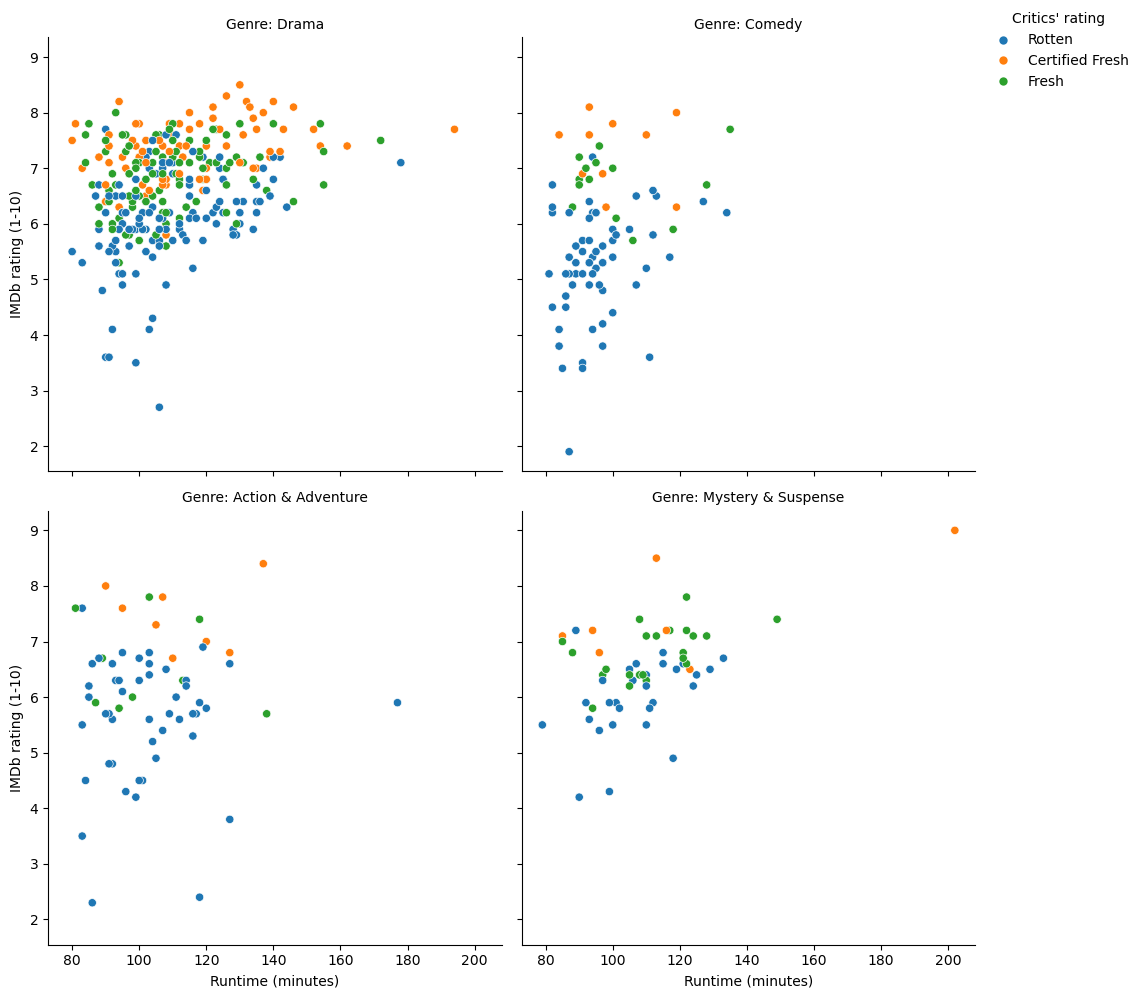

In [24]:

# Create a small multiples (or faceted) scatter plot of `imdb_rating` vs. 
#   `runtime` for each of the top 4 `genre`, colored by the `critics_rating`


# Subset data and sort
    # Select only columns needed for plot
Q1m = movies[['imdb_rating', 'runtime', 'genre', 'critics_rating']]
    # Select only the genres with the top 4 frequencies
Q1mTop4 = (Q1m.groupby('genre')
           .size()
           .reset_index(name='size')
           .sort_values(by='size', ascending=False)
           .head(4)
           .iloc[:4, 0]
          )

Q1mTop4Full = Q1m[Q1m['genre'].isin(Q1mTop4)]

# Make faceted figure
Q1mFig = sns.relplot(data=Q1mTop4Full,
            x='runtime',
            y='imdb_rating',
            col='genre',
            hue='critics_rating',
            kind='scatter',
            col_wrap=2)

# Set title, axis labels, and legend title
Q1mFig.set_titles("Genre: {col_name}")
Q1mFig.set_xlabels("Runtime (minutes)")
Q1mFig.set_ylabels("IMDb rating (1-10)")
Q1mFig._legend.set_title("Critics' rating")
# Move legend
sns.move_legend(Q1mFig, "upper right")
;


<!-- END QUESTION -->

# Q2 - Data Preprocessing 

You are asked to write two functions `minmaxNorm` and `zscoreNorm` to perform normalization on passed in data. Do not just use preprocessing or normalization functions available in Python.

The function `minmaxNorm` should take four arguments
* `trData` - the training data (use to establish the data properties for normalization)
* `teData` - the testing data, (if supplied default: None), to also be normalized according the the same data properties
* `minV` - minimum value of new range (default: 0)
* `maxV` - maximum value of new range (default: 1)

The function `zscoreNorm` should take three arguments
* `trData` - the training data (use to establish the data properties for normalization)
* `teData` - the testing data, (if supplied default: None), to also be normalized according the the same data properties
* `madFlag` - boolean flag, if positive, use mean abs. deviation instead of standard deviation. (default: False)

For many of our tasks, the data is split into subsets (by sample) of training and testing data (see slides: 03.classify.part2). The training data is used to estimate the parameters needed in the transformation: for `zscoreNorm`, μ - mean and σ - standard deviation for each attribute; for `minmaxNorm`, *min* and *max* values for each attribute.

Both the training and testing data (if passed in) are to be transformed using the parameters from the training data and passed into the function. If the input is 2D a matrix/data frame/etc., then be sure to scale each feature (column) separately.

In Python, the functions should work on lists (a single variable dataset), np.arrays (1D - a single variable dataset and 2D), and data frames (see sample inputs below). 

The functions should return a tuple-Python of the transformed training data and transformed testing data.  In Python, each item of the tuple should be a numpy array.  If no test data is included as input return None for this item of the tuple. 

A few example test cases are supplied with more tested.

*Hint:* 
I suggest taking the input training/testing data and converting to the same type, e.g., numpy arrays.  Then, do the normalization calculations on this single type of data object. 

### Test Examples 

```
in1 = [0, 1, 2, 5]
out1 = minmaxNorm(in1, None)
print(out1)

in2 = np.array([0, 1, 2, 4, 8])
out2 = minmaxNorm(in2, None, -1, 1)
print(out2)

in3 = np.array([[1, 3, 4, 5], [2, 6, 5, 8], [3, 4, 6, 9]])
in3test = np.array([2.5, 5, 4, 7])
out3 = minmaxNorm(in3, in3test, -1, 1)
print(out3)

in4 = pd.DataFrame([[1, 3, 4, 5], [2, 6, 5, 8],
                    [3, 4, 6, 9]])
out4 = minmaxNorm(in4, in3test, 0, 10)
print(out4)
```

    (array([0. , 0.2, 0.4, 1. ]), None)
    (array([-1.  , -0.75, -0.5 ,  0.  ,  1.  ]), None)
    (array([[-1.        , -1.        , -1.        , -1.        ],
           [ 0.        ,  1.        ,  0.        ,  0.5       ],
           [ 1.        , -0.33333333,  1.        ,  1.        ]]), array([ 0.5       ,  0.33333333, -1.        ,  0.        ]))
    (array([[ 0.        ,  0.        ,  0.        ,  0.        ],
           [ 5.        , 10.        ,  5.        ,  7.5       ],
           [10.        ,  3.33333333, 10.        , 10.        ]]), array([7.5       , 6.66666667, 0.        , 5.        ]))


In [25]:
def minmaxNorm(trData, teData=None, minV=0, maxV=1):
    # Perform min-max normalization on trData and teData
    # return a tuple of the transformed data as numpy arrays
    trDataArray = np.array(trData)
    min1 = trDataArray.min()
    max1 = trDataArray.max()
    trDataNorm = ((trDataArray-min1)/(max1-min1))*(maxV-minV)+minV
    # Normalize testing data if provided
    if teData is None:
        return trDataNorm, None
    teDataArray = np.array(teData)
    teDataNorm = ((teDataArray-min1)/(max1-min1))*(maxV-minV)+minV
    return trDataNorm, teDataNorm


# Testing code below - do not modify
in1 = [0, 1, 2, 5]
out1 = minmaxNorm(in1, None)
print(out1)

in2 = np.array([0, 1, 2, 4, 8])
out2 = minmaxNorm(in2, None, -1, 1)
print(out2)

in3 = np.array([[1, 3, 4, 5], [2, 6, 5, 8], [3, 4, 6, 9]])
in3test = np.array([2.5, 5, 4, 7])
out3 = minmaxNorm(in3, in3test, -1, 1)
print(out3)

in4 = pd.DataFrame([[1, 3, 4, 5], [2, 6, 5, 8],
                    [3, 4, 6, 9]])
out4 = minmaxNorm(in4, in3test, 0, 10)
print(out4)

(array([0. , 0.2, 0.4, 1. ]), None)
(array([-1.  , -0.75, -0.5 ,  0.  ,  1.  ]), None)
(array([[-1.  , -0.5 , -0.25,  0.  ],
       [-0.75,  0.25,  0.  ,  0.75],
       [-0.5 , -0.25,  0.25,  1.  ]]), array([-0.625,  0.   , -0.25 ,  0.5  ]))
(array([[ 0.  ,  2.5 ,  3.75,  5.  ],
       [ 1.25,  6.25,  5.  ,  8.75],
       [ 2.5 ,  3.75,  6.25, 10.  ]]), array([1.875, 5.   , 3.75 , 7.5  ]))


In [28]:

def zscoreNorm(trData, teData=None, madFlag=0):
    # Perform Gaussian normalization on trData and teData
    # return a tuple of the transformed data
    # Convert to np.array dtype
    trDataArray = np.array(trData)
    # Calculate parameters for equations
    mean = trDataArray.mean()
    stdev = np.std(trDataArray)
    mad = np.mean(np.abs(trDataArray-mean))
    # Equation for calculating z-score normalization
    # When madFlag==0, then use standard deviation
    if madFlag == 0:
        trDataNorm = (trDataArray-mean)/stdev
    # When madFlag==1, then use mean absolute deviation
    else:
        trDataNorm = (trDataArray-mean)/mad
    # Normalize testing data if provided
    if teData is None:
        return trDataNorm, None
    if madFlag == 0:
        teDataArray = np.array(teData)
        teDataNorm = (teDataArray-mean)/stdev
    else:
        teDataArray = np.array(teData)
        teDataNorm = (teDataArray-mean)/mad
    return trDataNorm, teDataNorm


In [27]:
grader.check("q2")

q2 results:
    q2 - 1 result:
        ✅ Test case passed

    q2 - 2 result:
        ✅ Test case passed

    q2 - 3 result:
        ✅ Test case passed

    q2 - 4 result:
        ✅ Test case passed

    q2 - 5 result:
        ✅ Test case passed

    q2 - 6 result:
        ✅ Test case passed

    q2 - 7 result:
        ✅ Test case passed

    q2 - 8 result:
        ✅ Test case passed

    q2 - 9 result:
        ❌ Test case failed
        Trying:
            in3 = np.array([[1, 3, 5, 4], [2, 6, 3, 8], [3, 10, 6, 9]])
        Expecting nothing
        ok
        Trying:
            out9 = minmaxNorm(in3, None)
        Expecting nothing
        ok
        Trying:
            np.allclose(out9[0], np.array([[0.0, 0.0, 0.66666667, 0.0], [0.5, 0.42857143, 0.0, 0.8], [1.0, 1.0, 1.0, 1.0]]))
        Expecting:
            True
        **********************************************************************
        Line 3, in q2 8
        Failed example:
            np.allclose(out9[0], np.array([[0.0, 0.0, 0.66666667, 0.0], [0.5, 0.42857143, 0.0, 0.8], [1.0, 1.0, 1.0, 1.0]]))
        Expected:
            True
        Got:
            False

    q2 - 10 result:
        ❌ Test case failed
        Trying:
            in3 = np.array([[1, 3, 5, 4], [2, 6, 3, 8], [3, 10, 6, 9]])
        Expecting nothing
        ok
        Trying:
            out12 = zscoreNorm(in3, None)
        Expecting nothing
        ok
        Trying:
            np.allclose(out12[0], np.array([[-1.22474487, -1.16247639, 0.26726124, -1.38873015], [0.0, -0.11624764, -1.33630621, 0.46291005], [1.22474487, 1.27872403, 1.06904497, 0.9258201]]))
        Expecting:
            True
        **********************************************************************
        Line 3, in q2 9
        Failed example:
            np.allclose(out12[0], np.array([[-1.22474487, -1.16247639, 0.26726124, -1.38873015], [0.0, -0.11624764, -1.33630621, 0.46291005], [1.22474487, 1.27872403, 1.06904497, 0.9258201]]))
        Expected:
            True
        Got:
            False

    q2 - 11 result:
        ❌ Test case failed
        Trying:
            in3 = np.array([[1, 3, 5, 4], [2, 6, 3, 8], [3, 10, 6, 9]])
        Expecting nothing
        ok
        Trying:
            out13 = zscoreNorm(in3, np.array([1, 6, 5, 8]))
        Expecting nothing
        ok
        Trying:
            np.allclose(out13[0], np.array([[-1.22474487, -1.16247639, 0.26726124, -1.38873015], [0.0, -0.11624764, -1.33630621, 0.46291005], [1.22474487, 1.27872403, 1.06904497, 0.9258201]])) & np.allclose(out13[1], np.array([-1.22474487, -0.11624764, 0.26726124, 0.46291005]))
        Expecting:
            True
        **********************************************************************
        Line 3, in q2 10
        Failed example:
            np.allclose(out13[0], np.array([[-1.22474487, -1.16247639, 0.26726124, -1.38873015], [0.0, -0.11624764, -1.33630621, 0.46291005], [1.22474487, 1.27872403, 1.06904497, 0.9258201]])) & np.allclose(out13[1], np.array([-1.22474487, -0.11624764, 0.26726124, 0.46291005]))
        Expected:
            True
        Got:
            False

    q2 - 12 result:
        ❌ Test case failed
        Trying:
            in3 = np.array([[1, 3, 5, 4], [2, 6, 3, 8], [3, 10, 6, 9]])
        Expecting nothing
        ok
        Trying:
            out14 = zscoreNorm(in3, np.array([[1, 3, 4, 5], [3, 2, 5, 6]]), madFlag=1)
        Expecting nothing
        ok
        Trying:
            np.allclose(out14[0], np.array([[-1.5, -1.36363636, 0.3, -1.5], [0.0, -0.13636364, -1.5, 0.5], [1.5, 1.5, 1.2, 1.0]])) & np.allclose(out14[1], np.array([[-1.5, -1.36363636, -0.6, -1.0], [1.5, -1.77272727, 0.3, -0.5]]))
        Expecting:
            True
        **********************************************************************
        Line 3, in q2 11
        Failed example:
            np.allclose(out14[0], np.array([[-1.5, -1.36363636, 0.3, -1.5], [0.0, -0.13636364, -1.5, 0.5], [1.5, 1.5, 1.2, 1.0]])) & np.all

# Q3 - Data Preprocessing

Let's now compare the normalization functions that you wrote above to using the normalization functions that are available in standard libraries: 

* Python: `MinMaxScaler` and `StandardScaler` or scale in `sklearn.preprocessing`


In [ ]:
# train/test data 
q3train = pd.DataFrame({'x1': [20, 37, 40, 60, 85, 120], 'x2': [-10, -8, 52, 3, 18, 23]})
q3test = pd.DataFrame({'x1': [42, 58, 101], 'x2': [-8, 42, 54]})

q3outA = minmaxNorm(q3train, None)
print(q3outA)

q3outB = zscoreNorm(q3train, q3test)
print(q3outB)

# use MinMaxScaler with default range parameters
scaler = ...
q3outC = ...
print(q3outC)

# use StandardScaler
scaler = ...
q3outDtrain = ...
q3outDtest = ...
print(q3outDtrain)
print(q3outDtest)


In [ ]:
grader.check("q3")

# Q4 - Performance Metrics 

Write a function to calculate: 
(a) true positive rate,
(b) false positive rate, 
(c) accuracy, and 
(d) Matthews Correlation Coefficient (MCC). 

You can make use of `sklearn.metrics` functions. 

The function will have inputs of `y_true` (np.array) - the true label for a set of samples and `y_pred` (np.array) - the predicted labels for a set of samples, and a threshold `thres_value` (float). 

The function returns a list of the true positive rate, false positive rate, accuracy and MCC for the inputs where the predicted labels are thresholded at the provided value (using >= comparisons). 


This function will then be used to create a DataFrames  with rows corresponding with the 10 thresholds (y_pred values) and columns reporting the different thresholds, the true positive rate (TPR), false positive rate (FPR), accuracy (ACC), and Matthews correlation coefficient (MCC).



In [ ]:

def calc_metrics(y_true, y_pred, thres_value):
    # Calculate tpr, fpr, accuracy, and MCC on input
    # Input: 
    #  y_true - sample labels       (np.array)
    #  y_pred - sample predictions  (np.array)
    #  thres_value - threshold for predictions,  >= 
    # Return list of tpr, fpr, accuracy, and MCC 
    
    ...
    return ...



y_true = np.array([1,1,0,1,1,0,1,0,0,0])
y_pred = np.array([0.98,0.92,0.85,0.77,0.71,0.64,0.57,0.42,0.34,0.32])


perfDF = pd.DataFrame(columns = ['Threshold', 'TPR', 'FPR', 'ACC', 'MCC']) 
i = 0 
for thres in y_pred: 
    tpr_val, fpr_val, acc_val, mcc_val = calc_metrics(y_true, y_pred, thres)
    perfDF.loc[i] = [thres, tpr_val, fpr_val, acc_val, mcc_val]
    i = i+1

perfDF

In [ ]:
grader.check("q4")

<!-- BEGIN QUESTION -->

# Q5 - Plot ROC Curve:

Use the results from Question 4 to plot the ROC curve for the data. 

Note, plot this curve using the standard plotting tools rather than any special library/package available for making ROC plots.

In [ ]:

# Create a ROC curve using the results from Q4





<!-- END QUESTION -->

# Q6 - NBA Rookies

For this problem you will use a data set of rookie NBA players from 1980 - 2017 seasons.  The dataset was collected from the NBA website API - https://www.nba.com. 

You will use the data from their rookie year to predict whether a player will last at least 5 seasons in the leaque. 

The data consists of variables:

* `PlayerID`, `Player` - variables to identify individual samples (ignore for prediction)
* `Tm`, `Year` - variables describing the year the player started and for what team (ignore for prediction)  
* `TARGET` - This is the target / class feature to be predicted (whether the player was in the league for at least 5 years). 

The remaining variables are predictor variables for the models.  They come in pairs "*\_DIFF" and "*\_A" reporting the given statistic as the difference between Team A and Team B and the statistic itself for Team A. 

* `Pos` - position of the player, power forward, point guard, shooting guard, center, etc.
* `Age` - player age
* `G` - sum of number of games played
* `GS` - sum of number of games started
* `MP` - sum of number of minutes played
* `PTS` - sum of number of points scored
* `FG` - sum of number of field goals made (both 2 and 3 pointers)
* `FGA` - sum of number of field goals attempted
* `FG%` - FG / FGA, percentage of field goals made 
* `3P` - sum of the number of 3 pointers made
* `3PA` - sum of the number of 3 pointers attempted
* `3P%` - 3P / 3PA, percentage of 3 pointers made
* `2P` - sum of the number of 2 point shots made
* `2PA` - sum of the number of 2 point shots attempted
* `2P%` - 2P / 2PA, percentage of 2 point shots made
* `eFG%` - Effective Field Goal Percentage, (`FG` + 0.5 * `3P`)/`FGA`
* `FT` - sum of the number of free throws made
* `FTA` - sum of the number of free throws attempted
* `FT%` - FT / FTA, percentage of free throws made
* `ORB` - sum of the number of offensive rebounds
* `DRB` - sum of the number of defensive rebounds
* `TRB` - sum of the number of total rebounds
* `AST` - sum of the number of assists
* `STL` - sum of the number of steals
* `BLK` - sum of the number of blocks
* `TOV` - sum of the number of turnovers
* `PF` - sum of the number of personal fouls

More information on the stats used can be found: https://www.nba.com/stats/help/glossary   
*Note, some of the abbreviations used here are slightly different* 


## Q6(a) - Load Data 

Load the `nba` data.


In [ ]:
nba = pd.read_csv(...) 

nba.head()

In [ ]:
grader.check("q6a")

## Q6(b) - Missing Data 

Let's investigate any missing values in the nba data. 

First, calculate and report the percentage of missing data for that variable (percentage of rows) in a DataSeries, `miss_nba`. 

In [ ]:
miss_nba = ... 

miss_nba

In [ ]:
grader.check("q6b")

Explore where these missing values you in the following code cell. 

**BE SURE TO COMMENT OUT YOUR CODE BEFORE SUBMITTING**

In [ ]:
# explore where the missing values are in your data. 


## Q6(c) - Handle missing data

By investigating where the missing data is, I hope you discovered the following: 

The missing values reside in two main types of columns (and for two different reasons):
* `GS` the game started column has missing values for almost all rookies in the 1980 and 1981 seasons with a few exceptions, e.g., Larry Bird, Clint Richardson, etc.
* Columns that calculate a percentage, `FG%`, `3P%`, `2P%`, `eFG%`, `FT%`
Here the missing values are due to a divide by zero.

Due to the different reasons for the data missing values will be handled differently in each situation. 

First, the missing values for `GS`, because there is not way to impute these values (and there are so few players in the 1980 and 1981 season having this information), the **all** samples from these two seasons should be deleted. 

For the missing values in the "percentage" columns, replace those missing values with 0. 

Call you new DataFrame after performing these operations `nba2`.


*Note* There may be situations where how you handle missing data (in particular, using imputation methods) should be done in the workflow/pipeline after already splitting for training/testing data in order to avoid possible data leakage.  However, the methods we employ here for dealing the the missing data are not using global properties to perform the imputation, therefore can be done at this state of the analysis. 

In [ ]:
nba2 = ... 

nba2.head()

In [ ]:
grader.check("q6c")

## Q6(d) - Labels 

Let's understand the what we should expect as a baseline performance for predicting whether the rookie play remains in the league for at least 5 years. 

(i). What fraction of players have a positive target label (in the league for at least 5 years)? Value should be in between 0 and 1.  
(ii).  What should a constant classifier model predict?   A *constant classifier* always predicts the same value no matter the input.   
(iii).  What is the error rate of the constant classifier? Value should be in between 0 and 1. 

Answer the following questions below.  Note, you should not use any `sklearn` functions, but simply look at properties of the data labels. 


In [ ]:

q6d_i = ...

q6d_ii = ...

q6d_iii = ...


In [ ]:
grader.check("q6d")

## Q6(e) - Prepare the data 

At this point, we need to set up the data in order to be used in the classification models. 

We want to create a DataFrame `nbaX` for the predictor variables and `nbaY` for the target variable. 

The target variable, `nbaY` will just be the `Target` column of the `nba2` data set. 

The predictor variables have more considerations. 

We want to exclude player information such as IDs, `PlayerID` and names `Player`, that are identifying and not predictive.   

You should also exclude these other factors (note, that some of these variables may in fact be predictive but we are going to exclude at this time): 

* `POS` - player position
* `Tm` - team
* `Year` - rookie year

Finally, several of the numeric predictive variables are not only related, but can be directly calculated from one another, e.g., `FG%` = `FG` / `FGA`.  Having variables that are closely related, or in this case redundant may actually hinder the predictive models. 

Therefore, exclude the following variables: `FG`, `3P`, `2P`, `eFG%`, `FT`, `TRB`. 

In [ ]:
nbaY = ...
nbaX = ...

print(nbaX.shape)
print(nbaY.shape)

In [ ]:
grader.check("q6e")

## Q6(f) - Model Selection and Evaluation: Three-fold Split

Split the data into training, validation and test sets with 60, 20, and 20% of the data respectively. Make sure to split the data such that the distribution of class labels is approximately equal across splits - “stratify”.

Set the seed for the random generator in `random_state` to ”4821”

In [ ]:
# Split of the test set
X_trainval, X_test, y_trainval, y_test = ...

# Split trainval into train + val 
X_train, X_val, y_train, y_val = ...


In [ ]:
grader.check("q6f")

## Q6(g) - Scaling 

Scale the predictor data with standard scaling (Gaussian normalizaiton). 

Make sure to use training data set to set scaling parameters and apply those parameters to scaling the training and validation data.

Use the train+val to scale the train+val data, and use those parameters to scale the test data to evaluate the best model. 

Helpful functions: Python - `StandardScaler` from `sklearn.preprocessing`.

In [ ]:
scaler = ...
X_train_sc = ...
X_val_sc = ...

scaler_final = ...
X_trainval_sc = ...
X_test_sc = ...


In [ ]:
grader.check("q6g")

## Q6(h) -  KNN - K Nearest Neighbors
For values of k, [3, 7, 11, 15, 19, 23, 27, 31], find the best k-nearest-neighbor classifier using the three-fold split of data. 

* fit a k nearest neighbors model to the training data for each value of k
* evaluate the classifier on the training and validation set using AUC
* select the best value of k
* create a model on train+validation with the *best* value of k 
* evaluate the classifier on the test data. 
* plot the training and validation performance vs k;  
add a line showing the test performance

In [ ]:

kvals = [3, 7, 11, 15, 19, 23, 27, 31]

knn_auc_val = np.zeros((1,len(kvals)))
knn_auc_tr = np.zeros((1,len(kvals)))


# fit a k nearest neighbors model to the training data
# evaluate the classifier on the training and validation set using auc


# select the best value of k
knn_bestk = ...

# create a best model on train+validation

# evaluate the classifier on the test data.
knn_auc_test = ...

# plot the training and validationing performance vs k.
#   add a line for test performance 




print('Best k:  %d' % (knn_bestk))
print('Test Perf:  %.6f' % (knn_auc_test))

In [ ]:
grader.check("q6h")

## Q6(i) - Decision Trees

For values of max_leaf_nodes nodes [5, 10, 25, 50, 75, 100], fit the Decision Trees classifier to the training data. 

- fit a decision tree model to the training data (use `random_state=4821`) for each of the max_leaf_nodes values
- evaluate the classifier on the training and validation set using AUC
- select the best max_leaf_nodes
- retrain the a model on train+validation with the *best* value of max_leaf_nodes 
- report the auc on the testing data.
- plot the train and validation AUC vs max_leaf_nodes;  
add a line for the test AUC performance 
- print out the best tree.

In [ ]:

nodes = [5, 10, 25, 50, 75, 100, 150]

dt_auc_val = np.zeros((1,len(nodes)))
dt_auc_tr = np.zeros((1,len(nodes)))

# fit a decision tree model to the training data (use random_state=4821)
# evaluate the classifier on the training and validation set using auc


# select the best max_leaf_nodes
dt_bestn = ...

# retrain the best model on train+validation
# report the auc on the testing data.
dt_auc_test = ...

# plot the train and validation auc vs max_leaf_nodes.
#   add a line for test performance 


print('Best max_leaf_nodes:  %d' % (dt_bestn))
print('Test Perf:  %.6f' % (dt_auc_test))

In [ ]:

# print out the tree



In [ ]:
grader.check("q6i")

## Q6(j) -  Naive Bayes 

Train a Gaussian Naive Bayes model on training + validation data and report the training+val and testing data performance (auc). 


In [ ]:
# q6j

nb_auc_trainval = ...
nb_auc_test = ...


In [ ]:
grader.check("q6j")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

**NOTE** the submission must be run on the campus linux machines.  See the instruction in the Canvas assignment.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)